# Multiview Spectral Clusting Tutorial on the UCI Dataset

In [1]:
from mvlearn.datasets.base import load_UCImultifeature
from mvlearn.cluster.mv_spectral import MultiviewSpectralClustering
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

In [2]:
help(load_UCImultifeature)

Help on function load_UCImultifeature in module multiview.datasets.base:

load_UCImultifeature(select_labeled='all')
    Load the UCI multiple features dataset, taken from
    https://archive.ics.uci.edu/ml/datasets/Multiple+Features
    This data set consists of 6 views of handwritten digit images, with
    classes 0-9. The 6 views are the following:
    
    1. 76 Fourier coefficients of the character shapes
    2. 216 profile correlations
    3. 64 Karhunen-Love coefficients
    4. 240 pixel averages of the images from 2x3 windows
    5. 47 Zernike moments
    6. 6 morphological features
    
    Each class contains 200 labeled examples.
    
    Parameters
    ----------
    select_labeled : optional, array-like, shape (n_features,) default (all)
        A list of the examples that the user wants by label. If not
        specified, all examples in the dataset are returned. Repeated labels
        are ignored.
    
    Returns
    -------
    data : list of np.ndarray, each of size 

### Load in UCI multiple feature dataset as an example

In [3]:
# Load dataset along with labels
n_class = 10
data, labels = load_UCImultifeature(select_labeled = list(range(n_class)))

# Just get the first two views of data
m_data = data[:2]

### Running multi-view spectral clustering on the data

In [4]:
#Multi-view spectral clustering
m_spectral = MultiviewSpectralClustering(n_clusters = n_class, n_views=len(m_data))
m_clusters = m_spectral.fit_predict(m_data)

### Plots of clusters produced by multi-view spectral clustering and the true clusters

In [5]:
#Run TSNE to display clustering results via low dimensional embedding
tsne = TSNE()
new_data_1 = tsne.fit_transform(m_data[0])
new_data_2 = tsne.fit_transform(m_data[1])

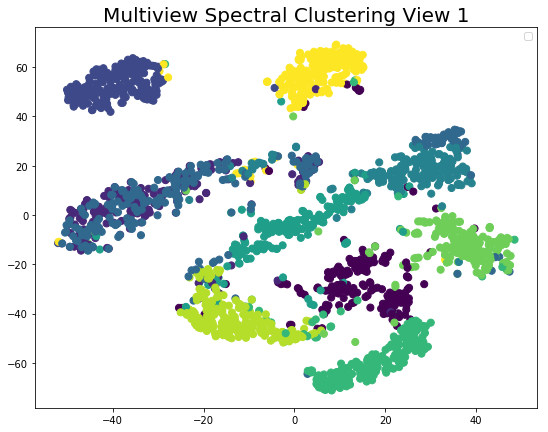

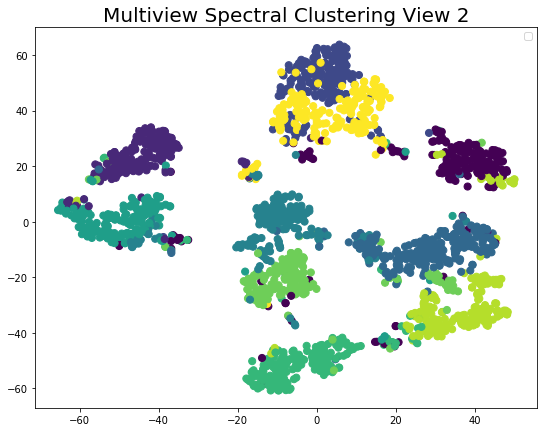

In [6]:
#Display clustering results for multi-view clustering
fig, ax = plt.subplots(figsize=(9,7))
cmap = 'viridis'
dot_size=50
ax.set_title('Multiview Spectral Clustering View 1', size=20)
ax.legend(['Digit 0, Digit 1, Digit 2, Digit 3, Digit 4'])
ax.scatter(new_data_1[:, 0], new_data_1[:, 1],c=m_clusters,s=dot_size, cmap=cmap)

fig, ax = plt.subplots(figsize=(9,7))
cmap = 'viridis'
dot_size=50
ax.set_title('Multiview Spectral Clustering View 2', size=20)
ax.legend(['Digit 0, Digit 1, Digit 2, Digit 3, Digit 4'])
ax.scatter(new_data_2[:, 0], new_data_2[:, 1],c=m_clusters,s=dot_size, cmap=cmap)

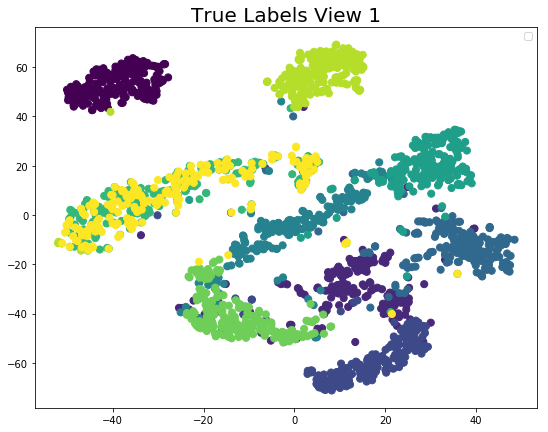

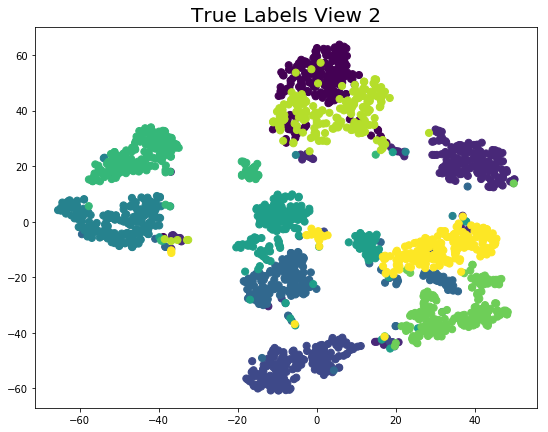

In [7]:
#Display true clusters based on class labels
fig, ax = plt.subplots(figsize=(9,7))
cmap = 'viridis'
dot_size=50
ax.set_title('True Labels View 1', size=20)
ax.legend(['Digit 0, Digit 1, Digit 2, Digit 3, Digit 4'])
ax.scatter(new_data_1[:, 0], new_data_1[:, 1],c=labels,s=dot_size, cmap=cmap)

fig, ax = plt.subplots(figsize=(9,7))
cmap = 'viridis'
dot_size=50
ax.set_title('True Labels View 2', size=20)
ax.scatter(new_data_2[:, 0], new_data_2[:, 1],c=labels,s=dot_size, cmap=cmap)